# Regression Homework

This is the first assignment for CAP 4630 and we will develop two basic models with regression. \
You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 100 Points)**


**Task Overview:**
- Singal Variable Nonlinear Regression 
- Multiple Variable Linear Regression


## 1 - Packages ##

Import useful packages for scientific computing and data processing. **(5 Points)**

**Tasks:**
1. Import numpy and rename it to np.
2. Import pandas and rename it to pd.
3. Import the pyplot function in the libraray of matplotlib and rename it to plt.

References:
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

**Attention:**
1. After this renaming, you will use the new name to call functions. For example, **numpy** will become **np** in the following sections.


In [3]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## 2 - Data Preparation ##

Prepare the data for regression task. **(10 Points)**

**Tasks:**
1. Load data for nonlinear regression.
2. Generate the scatter plot of the data.

**Hints:**
1. The data file is "data_nonlinear.csv".
2. The data format is as follows: 1st column is X and 2nd column is Y.
3. You may follow the example in class.
![](https://drive.google.com/uc?export=view&id=1cLvYRY-NXtukcmi5Av8G2Mz6XOQsheUO)

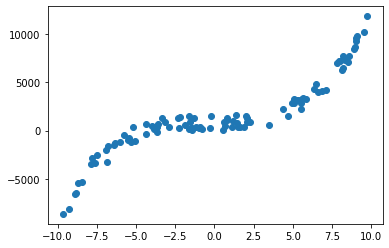

In [4]:
# Load csv file
url = '/content/data_nonlinear.csv'
data_nonlinear = pd.read_csv(url)

# Preprocessing Input data
X = data_nonlinear.iloc[:, 0]
Y = data_nonlinear.iloc[:, 1]
plt.scatter(X, Y)
plt.show()


## 3 - Single Variable Nonlinear Regression ##


Develop a regression model, estimate coefficients with data, and derive the relationship. **(30 Points)**

**Tasks:**
1. Establish a relationship between Y and X with a cubic function.
2. Compute MSE loss with observation-prediction pairs. 
3. Implement **Gradient Descent (GD)** to achieve optimal solution with the learning rate of **0.000001 (1e-6)** and **10000 (1e4)** epochs.
4. Print out the optimal solution at final step. 

**Hints:**  
1. Given the example of linear regression in class, modify the function to an equation for a spline with coefficients of **a** , **b**, **c** and **d** for cubic, qudractic, linear, and constant term.
2. Initialize the model with zero. For example, a=0, b=0, c=0 and d=0.
3. It may take **10-15 seconds**  to finish the running for 10000 steps. Be patient.
4. For debugging, the results of **a**, **b**, **c**, **d** for first five steps are as follows:

Epoch  0 :  2.8045093168662314 0.15006631239563697 0.04047903434004733 0.0030023401200892003 \
Epoch  1 :  4.905935374329749 0.2803623842843468 0.07068280026181122 0.0057565282228493 \
Epoch  2 :  6.480417434500056 0.395779237410925 0.09318576969022647 0.008323648642107889 \
Epoch  3 :  7.65996806232127 0.49998280146312246 0.10991745268097952 0.010749486523089888 \
Epoch  4 :  8.543527816733905 0.5957208253596222 0.12232397430880633 0.013068360586717544



In [5]:
# Building the model
a = 0
b = 0
c = 0
d = 0

L = 0.000001  # The learning Rate
epochs = 10000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = a*(X**3) + b*(X**2) +  c*X + d 
    D_a = (-2/n) * sum((X**3) * (Y - Y_pred))  # Derivative wrt a
    D_b = (-2/n) * sum((X**2) * (Y - Y_pred))  # Derivative wrt b
    D_c = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt c
    D_d = (-2/n) * sum(Y - Y_pred)  # Derivative wrt d
    a = a - L * D_a  # Update a
    b = b - L * D_b  # Update b
    c = c - L * D_c  # Update c
    d = d - L * D_d  # Update d
    print ("Epoch " + str(i) + ": " + str(a) + " " + str(b) + " " + str(c) + " " + str(d))
    


Streaming output truncated to the last 5000 lines.
Epoch 5000: 10.641187938754861 21.04078155332997 -0.8975419069801501 4.188658750446892
Epoch 5001: 10.641190806773308 21.04076739833366 -0.8977293208838449 4.189420870192431
Epoch 5002: 10.641193674762938 21.040753243351677 -0.8979167328257269 4.190182989202623
Epoch 5003: 10.641196542723751 21.040739088384043 -0.8981041428058152 4.19094510747747
Epoch 5004: 10.641199410655746 21.040724933430788 -0.8982915508241286 4.191707225016972
Epoch 5005: 10.641202278558923 21.04071077849193 -0.8984789568806861 4.192469341821133
Epoch 5006: 10.64120514643328 21.0406966235675 -0.8986663609755068 4.193231457889953
Epoch 5007: 10.64120801427882 21.04068246865751 -0.8988537631086095 4.193993573223435
Epoch 5008: 10.64121088209554 21.040668313761998 -0.8990411632800134 4.194755687821579
Epoch 5009: 10.641213749883441 21.04065415888098 -0.8992285614897372 4.195517801684387
Epoch 5010: 10.641216617642522 21.04064000401448 -0.8994159577378 4.196279914811

## 4 - Prediction Results ##

Derive prediction function and generate estmated results. **(5 Points)**

**Tasks:**
1. Derive prediction function with the obtained coefficients above.
2. Generate scatter plots for original data pairs X-Y and prediction results X-Y_Pred in the same figure.

**Hint:**
1. You may follow the example in class materials.
2. An example is shown below.
![](https://drive.google.com/uc?export=view&id=1QmisJjMa2aDeoKSClCG90c2KZUDEKmuC)

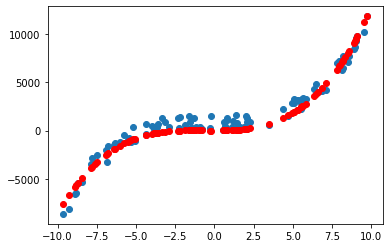

In [8]:
plt.scatter(X, Y)   # Plot the original data pairs
plt.scatter(X, Y_pred, color='red')     # Plot the predicted pairs
plt.show()

## 5 - Multiple Variables Linear Regression ##

## 5.1 Data Preparation

Prepare the data for regression task. **(10 Points)**

**Tasks:**
1. Load data for multiple variable linear regression.
2. Generate the 3D scatter plot of the data.

**Hints:**
1. The data file is "data_two_variables.csv".
2. The data format is as follows: 1st column is X1, 2nd column is X2, and 3rd colum is Y.
3. You may use "mplot3d" in the toolkit of "mpl_toolkits" and import "Axes3D" to faciliate 3D scatter plot. More details can be found in the reference of https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
4. [Optional, NO Credit]You may rotate the figure you generated by using "%matplotlib qt" before you plot it. Remember to install the related package by "!pip install PyQt5". Only work on Jupyter(locally). Does not work on Google Colab. [Reference Website](https://stackoverflow.com/questions/14261903/how-can-i-open-the-interactive-matplotlib-window-in-ipython-notebook)

![](https://drive.google.com/uc?export=view&id=1sHwWfZXpU3-8SqzFrmCxIvxmQWfe2Nns)
![](https://drive.google.com/uc?export=view&id=1OwHP0g-K2um-LnKiDhE6UfkDFxk4Opce)


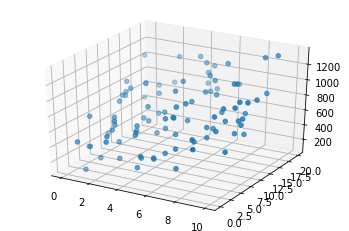

In [18]:
# Import packages
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the csv file
url = '/content/data_two_variables.csv'
data_two_variables = pd.read_csv(url)

# Preprocessing Input data
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

X1 = data_two_variables.iloc[:, 0]
X2 = data_two_variables.iloc[:, 1]
Y = data_two_variables.iloc[:, 2]

# Plot the data on a 3d graph
ax.scatter(X1,X2,Y)
plt.show()


## 5.2 Linear Regression

Develop a regression model, estimate coefficients with data, and derive the relationship. **(30 Points)**

**Tasks:**
1. Establish a linear function to describe the relationship among Y, X1, and X2.
2. Compute MSE loss with observation-prediction pairs.
3. Implement **Gradient Descent (GD)** to achieve optimal solution with the learning rate of **0.001 (1e-3)** and **10000 (1e4)** epochs.
4. Print out the optimal solution at final step. 


**Hints:**  
1. Given the example of linear regression in class, modify the function to a linear equation with two independent variables X1 and X2. The coefficients of X1 and X2 are **m1** and **m2**, respectively. The constant term is **m3**.
2. Initialize the model with zero. For example, m1=0, m2=0, and m3=0.
3. It may take **10-15 seconds**  to finish the running for 10000 steps. Be patient.
4. For debugging, the results of **m1**, **m2**, and **m3** for first five steps are as follows:

Epoch 0: 7.43847600018326 15.595631430047339 1.4265844915879997 \
Epoch 1: 12.954483113402425 26.731746959534096 2.481143659135288 \
Epoch 2: 17.084193849045587 34.664109745712814 3.2680146970514863 \
Epoch 3: 20.213137348549306 40.2953527521597 3.8622050343066556 \
Epoch 4: 22.618552798604984 44.274269323103674 4.317638791453634 \
Epoch 5: 32.734943422646175 34.69592128962032 222.91661391579638

In [21]:
# Building the model
m1 = 0
m2 = 0
m3 = 0

L = 0.001  # The learning Rate
epochs = 10000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m1*X1 + m2*X2 + m3  # The current predicted value of Y
    D_m1 = (-2/n) * sum(X1 * (Y - Y_pred))  # Derivative wrt m1
    D_m2 = (-2/n) * sum(X2 * (Y - Y_pred))  # Derivative wrt m2
    D_m3 = (-2/n) * sum(Y - Y_pred)  # Derivative wrt m3
    m1 = m1 - L * D_m1  # Update m1
    m2 = m2 - L * D_m2  # Update m2
    m3 = m3 - L * D_m3  # Update m3
    print ("Epoch " + str(i) + ": " + str(m1) + " " + str(m2) + " " + str(m3))
    

Streaming output truncated to the last 5000 lines.
Epoch 5000: 35.972629588550504 36.65907040974998 182.65092614842766
Epoch 5001: 35.97139034247532 36.65831900126952 182.66633811023416
Epoch 5002: 35.97015146238165 36.65756781469948 182.68174552048845
Epoch 5003: 35.968912948161424 36.656816849974334 182.69714838053468
Epoch 5004: 35.967674799706586 36.65606610702855 182.71254669171668
Epoch 5005: 35.96643701690911 36.65531558579664 182.72794045537782
Epoch 5006: 35.96519959966101 36.65456528621313 182.7433296728611
Epoch 5007: 35.96396254785434 36.65381520821255 182.75871434550916
Epoch 5008: 35.96272586138116 36.65306535172947 182.7740944746642
Epoch 5009: 35.961489540133584 36.65231571669846 182.789470061668
Epoch 5010: 35.96025358400376 36.65156630305413 182.804841107862
Epoch 5011: 35.95901799288385 36.6508171107311 182.8202076145872
Epoch 5012: 35.95778276666606 36.65006813966399 182.83556958318422
Epoch 5013: 35.956547905242616 36.64931938978748 182.85092701499335
Epoch 5014: 3


## 5.3 - Prediction Results ##

Derive prediction function and generate estmated results. **(10 Points)**

**Tasks:**
1. Derive prediction function with the obtained coefficients above.
2. Generate 3D scatter plots for original data pairs X-Y and prediction results X-Y_Pred in the same figure.

**Hint:**
1. You may follow the example above.
2. An example is shown below.
![](https://drive.google.com/uc?export=view&id=1xAl7eJmDmFPTNipd0SljAdyHs3PhRiMg)
![](https://drive.google.com/uc?export=view&id=1Eb9qZqTCmAbwJUkoTQ6zPys3ezWqTCkr)

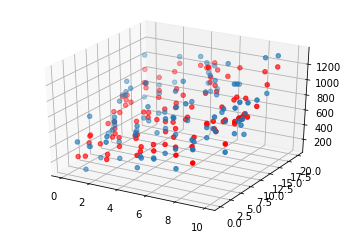

In [26]:
# Plot the original data 
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X1,X2,Y)

# Plot the predicted data
ax.scatter(X1,X2,Y_pred, color='red')
plt.show()